In [163]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [3]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))

describeData(X,Y)

Total number of images: 5547
Number of IDC(-) Images: 2759
Number of IDC(+) Images: 2788
Percentage of positive images: 50.26%
Image shape (Width, Height, Channels): (50, 50, 3)


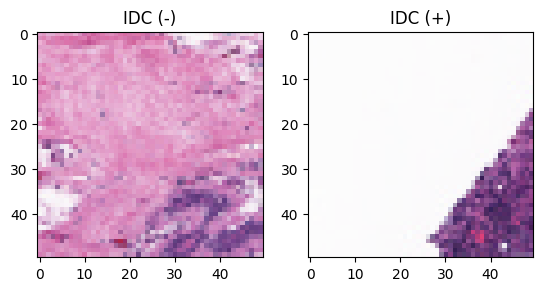

In [4]:
# Image where (Y=0 -> no IDC, Y=1 -> IDC)

def plotOne():
    """
    Plot one numpy array
    """
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(X[Y==0][0])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(X[Y==1][0])
    
plotOne() 

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:30000] 
Y_train = Y_train[0:30000]
X_test = X_test[0:30000] 
Y_test = Y_test[0:30000]

# Normalize the data
X_train = X_train / 256.0
X_test = X_test / 256.0

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)

Training Data Shape: (4437, 50, 50, 3) (4437, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3) (1110, 50, 50, 3)


In [77]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation='relu'))


model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 18432)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                589856    
                                                                 
Total params: 590,752
Trainable params: 590,752
Non-trainable params: 0
_________________________________________________________________


In [78]:
model1.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [79]:
history1 = model1.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
139/139 [==============================] - 3s 18ms/step - loss: 2.3229 - accuracy: 0.4981 - val_loss: 2.3240 - val_accuracy: 0.4856
Epoch 2/10
139/139 [==============================] - 2s 16ms/step - loss: 2.2935 - accuracy: 0.5003 - val_loss: 2.3369 - val_accuracy: 0.4856
Epoch 3/10
139/139 [==============================] - 2s 17ms/step - loss: 2.2613 - accuracy: 0.5003 - val_loss: 2.3509 - val_accuracy: 0.4856
Epoch 4/10
139/139 [==============================] - 3s 19ms/step - loss: 2.2570 - accuracy: 0.5003 - val_loss: 2.3102 - val_accuracy: 0.4856
Epoch 5/10
139/139 [==============================] - 2s 18ms/step - loss: 2.2371 - accuracy: 0.5003 - val_loss: 2.3039 - val_accuracy: 0.4856
Epoch 6/10
139/139 [==============================] - 2s 18ms/step - loss: 2.2254 - accuracy: 0.5003 - val_loss: 2.2987 - val_accuracy: 0.4856
Epoch 7/10
139/139 [==============================] - 3s 18ms/step - loss: 2.2196 - accuracy: 0.5003 - val_loss: 2.2895 - val_accuracy: 0.4856

In [178]:
# Extract the metrics from the history object
training_loss1 = round(history1.history['loss'][9], 2)
training_acc1 = round(history1.history['accuracy'][9], 2)
val_loss1 = round(history1.history['val_loss'][9], 2)
val_acc1 = round(history1.history['val_accuracy'][9], 2)

In [139]:
#create predicted labels
Y_pred1 = model1.predict(X_test)
Y_pred1 = np.argmax(Y_pred1, axis=1)

35/35 [==============================] - 0s 5ms/step


In [176]:
#compute F1 score
F1Score1 = round(f1_score(Y_test,Y_pred1, average='weighted'), 2)

F1_score on train dataset :  0.32


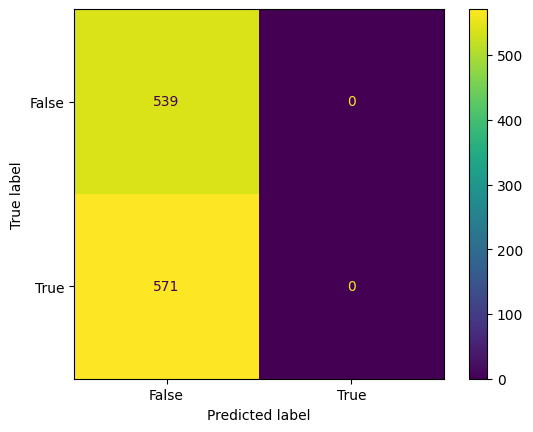

In [140]:
# compute the confusion matrix
cm1 = metrics.confusion_matrix(Y_test, Y_pred1)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])

# display the confusion matrix
cm_display1.plot()
plt.show()

Text(0.5, 1.0, 'Train - Accuracy')

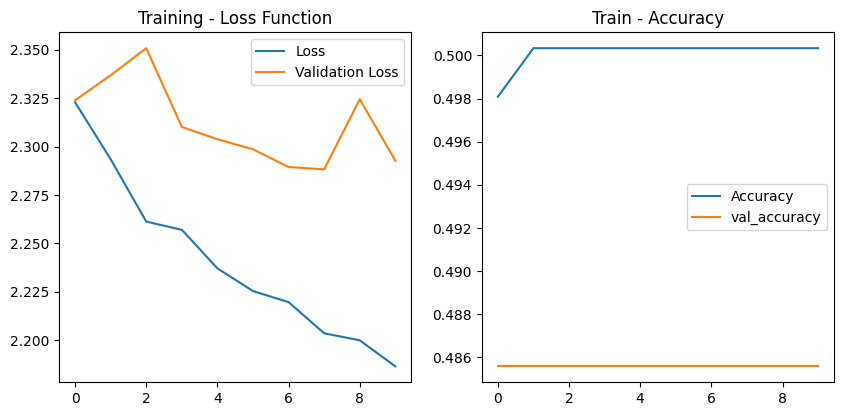

In [80]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [10]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [21]:
model2.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [22]:
history2 = model2.fit(X_train, Y_train, epochs=20, 
                    validation_data=(X_test, Y_test))

Epoch 1/20
139/139 [==============================] - 6s 37ms/step - loss: 0.5572 - accuracy: 0.7323 - val_loss: 0.5502 - val_accuracy: 0.7225
Epoch 2/20
139/139 [==============================] - 5s 37ms/step - loss: 0.5354 - accuracy: 0.7458 - val_loss: 0.5063 - val_accuracy: 0.7649
Epoch 3/20
139/139 [==============================] - 6s 42ms/step - loss: 0.5234 - accuracy: 0.7512 - val_loss: 0.5132 - val_accuracy: 0.7649
Epoch 4/20
139/139 [==============================] - 6s 45ms/step - loss: 0.5164 - accuracy: 0.7559 - val_loss: 0.5029 - val_accuracy: 0.7640
Epoch 5/20
139/139 [==============================] - 7s 53ms/step - loss: 0.4971 - accuracy: 0.7634 - val_loss: 0.5035 - val_accuracy: 0.7559
Epoch 6/20
139/139 [==============================] - 7s 49ms/step - loss: 0.5043 - accuracy: 0.7573 - val_loss: 0.4987 - val_accuracy: 0.7712
Epoch 7/20
139/139 [==============================] - 6s 44ms/step - loss: 0.4844 - accuracy: 0.7794 - val_loss: 0.5429 - val_accuracy: 0.7306

In [175]:
# Extract the metrics from the history object
training_loss2 = round(history2.history['loss'][19], 2)
training_acc2 = round(history2.history['accuracy'][19], 2)
val_loss2 = round(history2.history['val_loss'][19], 2)
val_acc2 = round(history2.history['val_accuracy'][19], 2)

Training Loss: 0.25
Training Accuracy: 0.9
Validation Loss: 0.72
Validation Accuracy: 0.74


In [137]:
#create predicted labels
Y_pred2 = model2.predict(X_test)
Y_pred2 = np.argmax(Y_pred2, axis=1)

35/35 [==============================] - 0s 7ms/step


In [174]:
#compute F1 score
F1Score2 = round(f1_score(Y_test,Y_pred2, average='weighted'), 2)

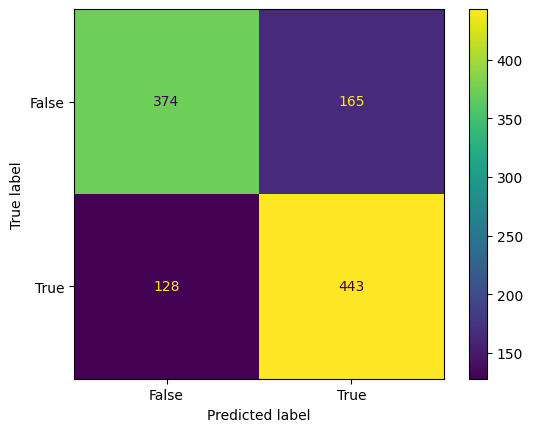

In [138]:
# compute the confusion matrix
cm2 = metrics.confusion_matrix(Y_test, Y_pred2)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])

# display the confusion matrix
cm_display2.plot()
plt.show()

Text(0.5, 1.0, 'Train - Accuracy')

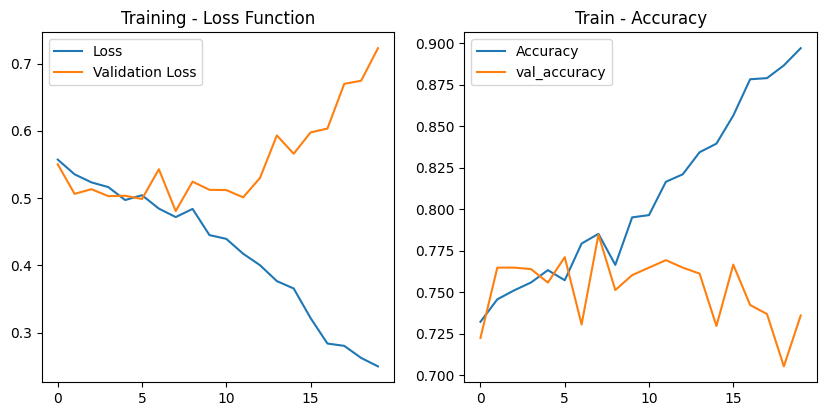

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [14]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                  

In [15]:
model3.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [16]:
history3 = model3.fit(X_train, Y_train, epochs=20, 
                    validation_data=(X_test, Y_test))

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


139/139 [==============================] - 15s 101ms/step - loss: 0.7369 - accuracy: 0.4947 - val_loss: 0.6774 - val_accuracy: 0.5378
Epoch 2/20
139/139 [==============================] - 14s 100ms/step - loss: 0.6352 - accuracy: 0.6435 - val_loss: 0.5648 - val_accuracy: 0.7369
Epoch 3/20
139/139 [==============================] - 14s 102ms/step - loss: 0.5969 - accuracy: 0.6993 - val_loss: 0.5777 - val_accuracy: 0.7441
Epoch 4/20
139/139 [==============================] - 17s 121ms/step - loss: 0.5619 - accuracy: 0.7325 - val_loss: 0.5417 - val_accuracy: 0.7342
Epoch 5/20
139/139 [==============================] - 18s 129ms/step - loss: 0.5524 - accuracy: 0.7368 - val_loss: 0.5398 - val_accuracy: 0.7279
Epoch 6/20
139/139 [==============================] - 16s 117ms/step - loss: 0.5554 - accuracy: 0.7291 - val_loss: 0.5401 - val_accuracy: 0.7613
Epoch 7/20
139/139 [==============================] - 16s 118ms/step - loss: 0.5519 - accuracy: 0.7368 - val_loss: 0.5355 - val_accuracy: 0.7

In [171]:
# Extract the metrics from the history object
training_loss3 = round(history3.history['loss'][19], 2)
training_acc3 = round(history3.history['accuracy'][19], 2)
val_loss3 = round(history3.history['val_loss'][19], 2)
val_acc3 = round(history3.history['val_accuracy'][19], 2)


In [132]:
#create predicted labels
Y_pred3 = model3.predict(X_test)
Y_pred3 = np.argmax(Y_pred3, axis=1)

35/35 [==============================] - 1s 18ms/step


In [173]:
#compute F1 score
F1Score3 = round(f1_score(Y_test,Y_pred3, average='weighted'), 2)

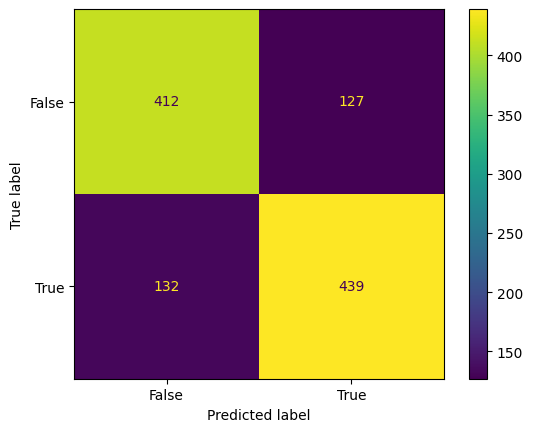

In [136]:
# compute the confusion matrix
cm3 = metrics.confusion_matrix(Y_test, Y_pred3)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = [False, True])

# display the confusion matrix
cm_display3.plot()
plt.show()

Text(0.5, 1.0, 'Train - Accuracy')

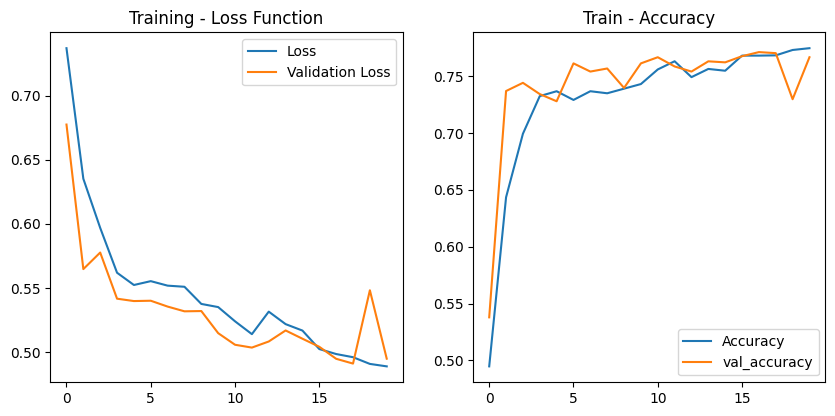

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [179]:
data = [[1, F1Score1, training_loss1, training_acc1, val_loss1, val_acc1],
        [2, F1Score2, training_loss2, training_acc2, val_loss2, val_acc2],
        [3, F1Score3, training_loss3, training_acc3, val_loss3, val_acc3]]

headers = ["Model", "F1 Score", "Loss", "Accuracy", "Val Loss", "Val Accuracy"]

print(tabulate(data, headers=headers))


  Model    F1 Score    Loss    Accuracy    Val Loss    Val Accuracy
-------  ----------  ------  ----------  ----------  --------------
      1        0.32    2.19        0.5         2.29            0.49
      2        0.74    0.25        0.9         0.72            0.74
      3        0.77    0.49        0.77        0.49            0.77
